## Objective
Plot diagram for norm STD curation

In [ ]:
%load_ext autoreload
%autoreload

import sys
PATH = "/data/MEAprojects/DLSpikeSorter"
if PATH not in sys.path:
    sys.path.append(PATH)

import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes

import numpy as np

from src.analysis.recording import Recording
from src.analysis import standardize
from src.analysis.kilosort import Kilosort

In [38]:
kilosort = Kilosort("2953", "first")
recording = Recording(standardize.REC_FILE.format("2953"), 300, 6000, "2953")

In [141]:
npz = np.load(f"/data/MEAprojects/DLSpikeSorter/2953/sorted.npz", allow_pickle=True)
for i, unit in enumerate(npz["units"]):

    curation = (unit["amplitudes"] >= 3) * (unit["std_norms"] > 0.6)

    real = (unit["amplitudes"] >= 3) * (unit["std_norms"] < 0.6)

    if np.sum(curation) > 0 and np.sum(real) > 0:
        print(i, unit["unit_id"], np.flatnonzero(curation), np.sum(real))

2 316 [747 791] 3
5 295 [197] 2
31 1 [247 347 485] 3
41 104 [ 63 249 347] 4
45 261 [641] 2
48 217 [1001] 2
76 40 [48] 1
103 332 [971] 1
107 103 [239] 1


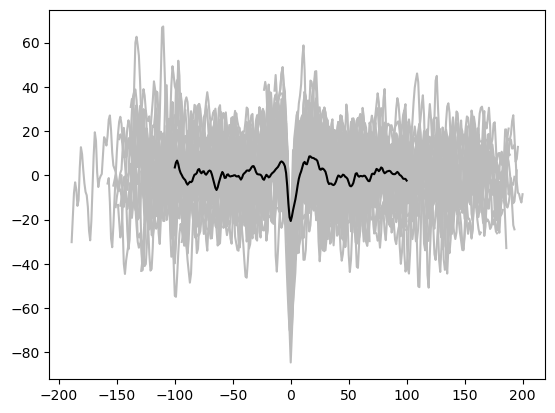

In [147]:
UNIT_ID = 295#  316
CHAN_IDX = 197 # 747
fig, ax = plt.subplots(1)

waveforms = np.load(f"/data/MEAprojects/DLSpikeSorter/2953/spikesort_matlab4/waveforms/waveforms/waveforms_{UNIT_ID}.npy")
# Show STD Norm
for i in range(len(waveforms)):
    wf = waveforms[i, :, CHAN_IDX]
    x = np.arange(len(wf)) - np.argmin(wf)
    plt.plot(x, wf, c="#bbbbbb")
temp = np.mean(waveforms[:, :, CHAN_IDX], axis=0)
x = np.arange(len(temp)) - np.argmin(temp)
plt.plot(x, temp, c="black")

#     plot_waveform(a0, waveforms[i, :, mean_template_chan], sampling_frequency=SAMPLING_FREQUENCY,
#                   x_window=n_samples, c="#bbbbbb", alpha=0.1, y_label="Voltage (μV)")
# plot_waveform(a0, mean_template[:, mean_template_chan], sampling_frequency=SAMPLING_FREQUENCY,
#               x_window=n_samples, c="black", linewidth=1.75)
#
# plot_waveform(a1, templates_std[UNIT_ID, :, mean_template_chan], sampling_frequency=SAMPLING_FREQUENCY,
#               x_window=n_samples, y_label=None, c="blue")
# # a1.set_ylabel("STD")
#
# plot_waveform(a2, templates_std[UNIT_ID, :, mean_template_chan]/np.abs(mean_template[100, mean_template_chan]), sampling_frequency=SAMPLING_FREQUENCY,
#               x_window=n_samples, y_label=None, c="#ff0000")
# a2.set_ylabel("STD Scaled by Amplitude")
# a2.hlines(0.3, xmin=-2.5, xmax=2.5, colors="#fe7e10")
# fig.tight_layout(w_pad=3)
plt.show()

In [148]:
from tqdm import tqdm

100%|██████████| 1020/1020 [00:00<00:00, 36194.20it/s]


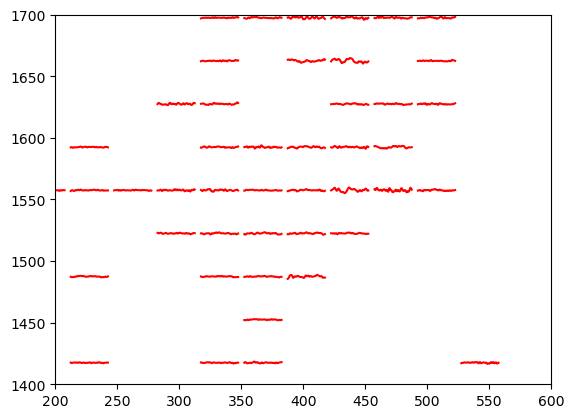

In [158]:
XLIM = (200, 600)  # (-50, 3850+50)
YLIM = (1400, 1700)  # (-50, 2100+50)
##
locations = npz["locations"]

# Plot waveforms
for unit in npz["units"]:
    if unit["unit_id"] == UNIT_ID:
        break
curation = (unit["amplitudes"] >= 3) * (unit["std_norms"] < 0.6)

fig, ax = plt.subplots(1)
waveforms = np.load(f"/data/MEAprojects/DLSpikeSorter/2953/spikesort_matlab4/waveforms/waveforms/waveforms_{UNIT_ID}.npy")[:, 80:141, :]
for chan in tqdm(range(len(curation))):
    x, y = locations[chan]
    if not (XLIM[0] < x < XLIM[1] and YLIM[0] < y < YLIM[1]): continue

    color = "black" if curation[chan] else "red"

    if color == "black": print(x, y)

    temp = np.mean(waveforms[:, :, chan], axis=0)

    temp *= 3 / 6.295
    loc = locations[chan]

    x = np.arange(temp.size, dtype=float) - 100
    x *= 0.5

    x += loc[0]
    temp += loc[1]

    # for wf in waveforms[:, :, chan]:
    #     ax.plot(x, wf*3/6.295 + loc[1], color="#bbbbbb")
    ax.plot(x, temp, color=color, alpha=1)

ax.set_ylim(YLIM)
ax.set_xlim(XLIM)
plt.show()

100%|██████████| 1020/1020 [00:00<00:00, 9260.29it/s]


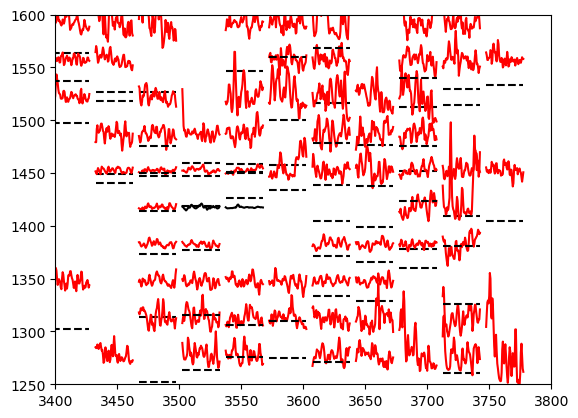

In [156]:
##
locations = npz["locations"]

# Plot waveforms
for unit in npz["units"]:
    if unit["unit_id"] == UNIT_ID:
        break
curation = (unit["amplitudes"] >= 3) * (unit["std_norms"] < 0.6)

fig, ax = plt.subplots(1)

waveforms = np.load(f"/data/MEAprojects/DLSpikeSorter/2953/spikesort_matlab4/waveforms/waveforms/waveforms_{UNIT_ID}.npy")[:, 80:141, :]
for chan in tqdm(range(len(curation))):
    x, y = locations[chan]
    if not (XLIM[0] < x < XLIM[1] and YLIM[0] < y < YLIM[1]): continue

    color = "black" if curation[chan] else "red"

    temp = np.std(waveforms[:, :, chan], axis=0) / unit["amplitudes"][chan] / 6.295
    median = np.median(temp)
    temp -= median

    temp *= 20
    loc = locations[chan]

    x = np.arange(temp.size, dtype=float) - 100
    x *= 0.5

    x += loc[0]
    temp += loc[1]

    # if color == "red":
    #     test = np.max( np.std(waveforms[:, :, chan], axis=0) / unit["amplitudes"][chan] / 6.295)
    #     if test > 0.6:
    #         ax.scatter(*loc, s=50)

    ax.plot(x, temp, color=color, alpha=1)
    ax.plot(x, [(0.6 - median) * 20 + loc[1]] * len(x), color="black", linestyle="dashed")

ax.set_ylim(YLIM)
ax.set_xlim(XLIM)
plt.show()

In [122]:
locations[CHAN_IDX]

array([ 437.5, 1522.5])